<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240219/new_task1_youjin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Signal Smoothing - Gaussian


In [2]:
import pandas as pd
import csv
from scipy.ndimage import gaussian_filter
import os

base_directory = '/content/drive/MyDrive/Refractive_Index_Measurements_New/1stSeries_07.05.21'

all_csv_X = []
all_csv_Y = []

for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.CSV') and file != 'REF.CSV':
            file_path = os.path.join(root, file)

            with open(file_path, 'rt') as f:
                reader = csv.reader(f)
                csv_content = [raw for raw in reader]
            f.close()
            df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
            df = df.astype(float)
            df.columns = ['X', 'Y']
            Y = float(os.path.basename(root))
            all_csv_X.append(df)
            all_csv_Y.append(Y)


# **classification - 5 label**

In [5]:
Y = pd.DataFrame(all_csv_Y, columns=['Y'])
df_Y = pd.DataFrame(all_csv_Y, columns=['Y'])
len(Y)
for i in range(len(df_Y['Y'])):
    if df_Y['Y'][i] < 1.30:
        df_Y['Y'][i] = 'Normal_tissue'
    elif df_Y['Y'][i] >= 1.30 and df_Y['Y'][i] <=1.32:
      df_Y['Y'][i] = 'CIN_1'
    elif df_Y['Y'][i] >= 1.33 and df_Y['Y'][i] <1.38:
      df_Y['Y'][i] = 'CIN_2'
    elif df_Y['Y'][i] >= 1.38 and df_Y['Y'][i] <=1.39:
      df_Y['Y'][i] = 'CIN_3'
    else:
      df_Y['Y'][i] = 'Cervical_Cancer'
print(Y)
print(df_Y)

        Y
0    1.31
1    1.31
2    1.31
3    1.31
4    1.31
..    ...
226  1.42
227  1.42
228  1.42
229  1.42
230  1.42

[231 rows x 1 columns]
                   Y
0              CIN_1
1              CIN_1
2              CIN_1
3              CIN_1
4              CIN_1
..               ...
226  Cervical_Cancer
227  Cervical_Cancer
228  Cervical_Cancer
229  Cervical_Cancer
230  Cervical_Cancer

[231 rows x 1 columns]


# **classification - 2 label**

In [4]:
Y = pd.DataFrame(all_csv_Y, columns=['Y'])
df_Y = pd.DataFrame(all_csv_Y, columns=['Y'])
len(Y)
for i in range(len(df_Y['Y'])):
    if df_Y['Y'][i] < 1.30:
        df_Y['Y'][i] = 'Normal_tissue'
    else:
      df_Y['Y'][i] = 'Cancer'
print(Y)
print(df_Y)

        Y
0    1.31
1    1.31
2    1.31
3    1.31
4    1.31
..    ...
226  1.42
227  1.42
228  1.42
229  1.42
230  1.42

[231 rows x 1 columns]
          Y
0    Cancer
1    Cancer
2    Cancer
3    Cancer
4    Cancer
..      ...
226  Cancer
227  Cancer
228  Cancer
229  Cancer
230  Cancer

[231 rows x 1 columns]


# **features Calculation**

In [43]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks

analysis_values = []
for df, label in zip(all_csv_X, all_csv_Y):
    smoothed_signal = gaussian_filter(df['Y'], sigma=50)
    peaks, _ = find_peaks(smoothed_signal)

    peak_values = df['Y'][peaks].reset_index(drop=True)
    peak_times = df['X'][peaks].reset_index(drop=True)

    time_diff = np.diff(peak_times)
    std_signal_peak = np.std(time_diff)
    mean_signal_peak = np.mean(time_diff)
    min_signal_peak = np.min(time_diff)

    analysis_values.append([std_signal_peak, min_signal_peak, mean_signal_peak])

data = pd.DataFrame(analysis_values, columns=['std','min', 'mean'])
print(data)

          std     min      mean
0    0.081840  3.0754  3.210839
1    3.510823  3.0556  3.940971
2    0.082734  3.0556  3.209974
3    0.079995  3.0555  3.209974
4    0.081905  3.0555  3.209970
..        ...     ...       ...
226  0.065103  2.8175  2.914467
227  0.050467  2.8571  2.925489
228  0.061652  2.8174  2.914456
229  0.042073  2.8572  2.936513
230  0.060625  2.8373  2.916667

[231 rows x 3 columns]


# **Dataset**

In [44]:
spectrum_data = pd.concat([data, df_Y], axis=1)
print(spectrum_data)


          std     min      mean                Y
0    0.081840  3.0754  3.210839            CIN_1
1    3.510823  3.0556  3.940971            CIN_1
2    0.082734  3.0556  3.209974            CIN_1
3    0.079995  3.0555  3.209974            CIN_1
4    0.081905  3.0555  3.209970            CIN_1
..        ...     ...       ...              ...
226  0.065103  2.8175  2.914467  Cervical_Cancer
227  0.050467  2.8571  2.925489  Cervical_Cancer
228  0.061652  2.8174  2.914456  Cervical_Cancer
229  0.042073  2.8572  2.936513  Cervical_Cancer
230  0.060625  2.8373  2.916667  Cervical_Cancer

[231 rows x 4 columns]


In [52]:
from sklearn.model_selection import train_test_split
XX = spectrum_data[['mean','std']]
YY = spectrum_data['Y']

from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#Y_s = le.fit_transform(YY)

X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.3, train_size=0.7, random_state=123)
print(X_train.shape)
print(y_train.shape)

(161, 2)
(161,)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

knn = KNeighborsClassifier(n_neighbors=1)
rf = RandomForestClassifier(n_estimators=100)
svm= SVC(kernel='rbf', C=1.0)

start_knn = time.time()
knn.fit(X_train, y_train)
end_knn = time.time()

start_rf = time.time()
rf.fit(X_train, y_train)
end_rf = time.time()

start_svm = time.time()
svm.fit(X_train, y_train)
end_svm = time.time()


y_knn = knn.predict(X_test)
y_rf = rf.predict(X_test)
y_svm = svm.predict(X_test)

#Y_test = le.inverse_transform(y_test)
#Y_knn = le.inverse_transform(predicted_labels_knn)
#Y_rf = le.inverse_transform(predicted_labels_rf)
#Y_svm = le.inverse_transform(predicted_labels_svm)

print(end_knn-start_knn)
print(end_svm-start_svm)
print(end_rf-start_rf)

0.010347604751586914
0.008111238479614258
0.29051923751831055


**KNN**

knn_Accuracy: 1.0
                 precision    recall  f1-score   support

          CIN_1       1.00      1.00      1.00         7
          CIN_2       1.00      1.00      1.00        17
          CIN_3       1.00      1.00      1.00         7
Cervical_Cancer       1.00      1.00      1.00        39

       accuracy                           1.00        70
      macro avg       1.00      1.00      1.00        70
   weighted avg       1.00      1.00      1.00        70



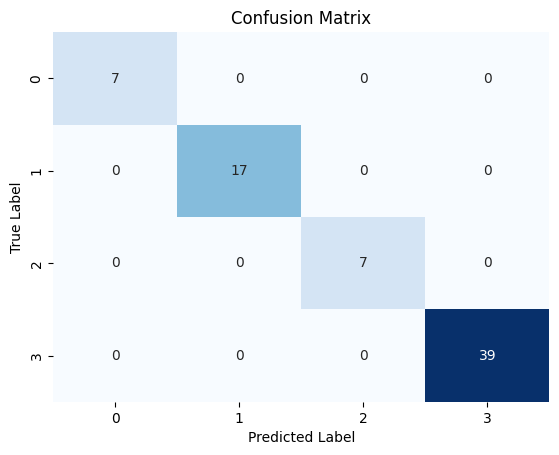

In [54]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_knn)
print(f"knn_Accuracy: {accuracy_knn}")

cm_knn = confusion_matrix(y_test, y_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_knn)

print(report)

# Display the plot
plt.show()

**Random Forest**

rf_Accuracy: 0.9714285714285714
                 precision    recall  f1-score   support

          CIN_1       1.00      1.00      1.00         7
          CIN_2       1.00      1.00      1.00        17
          CIN_3       1.00      0.71      0.83         7
Cervical_Cancer       0.95      1.00      0.97        39

       accuracy                           0.97        70
      macro avg       0.99      0.93      0.95        70
   weighted avg       0.97      0.97      0.97        70



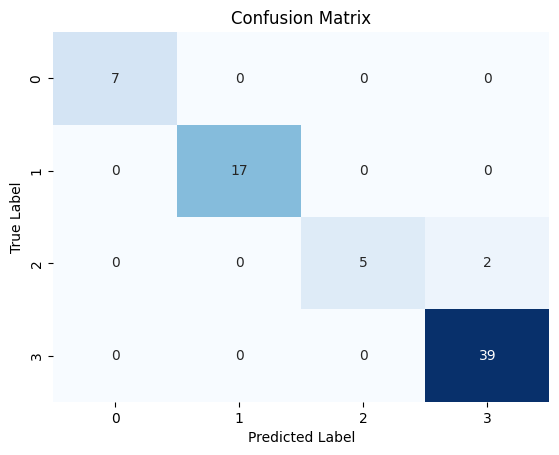

In [55]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_rf)
print(f"rf_Accuracy: {accuracy_rf}")

cm_rf = confusion_matrix(y_test, y_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_rf)

print(report)

# Display the plot
plt.show()

**SVM**

svm_Accuracy: 0.8714285714285714
                 precision    recall  f1-score   support

          CIN_1       1.00      0.57      0.73         7
          CIN_2       0.74      1.00      0.85        17
          CIN_3       1.00      0.14      0.25         7
Cervical_Cancer       0.93      1.00      0.96        39

       accuracy                           0.87        70
      macro avg       0.92      0.68      0.70        70
   weighted avg       0.90      0.87      0.84        70



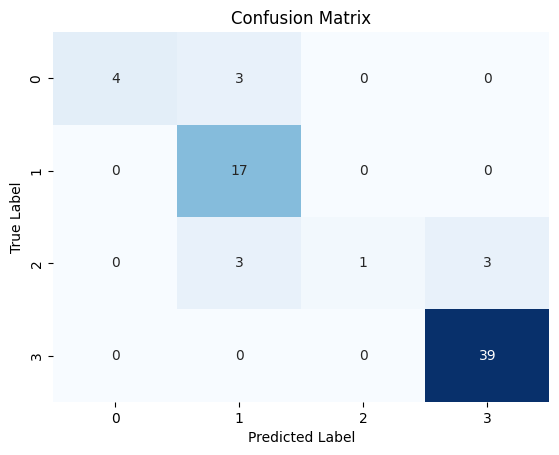

In [56]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_svm)
print(f"svm_Accuracy: {accuracy_svm}")

cm_svm = confusion_matrix(y_test, y_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_svm)

print(report)

# Display the plot
plt.show()